<a href="https://colab.research.google.com/github/jpdeleon/quicklook/blob/main/notebook/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the next cell to install `quicklook` and its dependencies.

In [1]:
!python -m pip install -r https://raw.githubusercontent.com/jpdeleon/quicklook/main/requirements.txt
!python -m pip install -e git+https://github.com/jpdeleon/quicklook.git#egg=tql

Obtaining tql from git+https://github.com/jpdeleon/quicklook.git#egg=tql
  Cloning https://github.com/jpdeleon/quicklook.git to ./src/tql
  Running command git clone --filter=blob:none --quiet https://github.com/jpdeleon/quicklook.git /home/jp/github/research/project/quicklook/notebook/src/tql
  Resolved https://github.com/jpdeleon/quicklook.git to commit 3d4b2b31fba97f225222c426b8df02a486ef7437
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
Discarding git+https://github.com/jpdeleon/quicklook.git#egg=tql: Requested quicklook from git+https://github.com/jpdeleon/quicklook.git#egg=tql has inconsistent name: expected 'tql', but metadata has 'quicklook'
ERROR: Could not find a version that satisfies the requirement tql (unavailable) (from versions: 0.0.1560759555, 0.0.1560998220, 2019.8.2

Check if quicklook is installed in your environment.

In [2]:
!python -m pip show quicklook

Name: quicklook
Version: 1.0
Summary: Quicklook lightcurve plot generator
Home-page: https://github.com/jpdeleon/quicklook
Author: Jerome de Leon
Author-email: jpdeleon <jpdeleon.bsap@gmail.com>
License: 
Location: /home/jp/miniconda3/envs/ql/lib/python3.11/site-packages
Editable project location: /home/jp/github/research/project/quicklook
Requires: 
Required-by: 


## Example 1

In [3]:
%matplotlib inline
#import the tql module inside the quicklook package
from tql import TessQuickLook

#initialize the class by simply supplying the target name
target = TessQuickLook(target_name="WASP-21")

/home/jp/miniconda3/envs/ql/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/jp/.lightkurve/cache. Please move all the files in the legacy directory /home/jp/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


Generating TQL for WASP-21...
All available lightcurves:
      author         mission  t_exptime
0       SPOC  TESS Sector 56       20.0
1       SPOC  TESS Sector 56      120.0
2  TESS-SPOC  TESS Sector 56      200.0
3        QLP  TESS Sector 56      200.0
Available sectors: [56]

Downloaded SPOC (exp=120.0 s) lc in sector 56.

Querying ephemeris for WASP-21:
epoch: 2459826.311145, 0.0004323943
per: 4.32262294185784, 0.00011471372
dur: 3.36990246699019, 0.034073763

Using wotan's biweight method to flatten raw lc.
Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 38 durations
Searching 16230 data points, 2532 periods from 0.601 to 13.84 days
Using all 8 CPU threads


100%|██████████████████████████████████████████| 2532/2532 periods | 00:15<00:00


Searching for best T0 for period 4.32412 days


Above is the log when initializing the target. It's not important for now. Let's plot the results.

Estimating rotation period using Generalized Lomb-Scargle (GLS) periodogram.
No output of frequency error.
Increase frequency range to sample the peak maximum.
Generalized LS - statistical output
-----------------------------------
Number of input points:      18905
Weighted mean of dataset:   nan
Weighted rms of dataset:    nan
Time base:                  27.880613
Number of frequency points:   2769

Maximum power p [ZK]: nan
RMS of residuals:     nan
  Mean weighted internal error:  nan
Best sine frequency:  0.071734 +/- nan
Best sine period:     13.940307 +/- nan
Amplitude:            nan +/- nan
-----------------------------------
lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      436478932      
          default_view         period      
                 label  TIC 436478932      
             ls_method           fast      
frequency_at_m

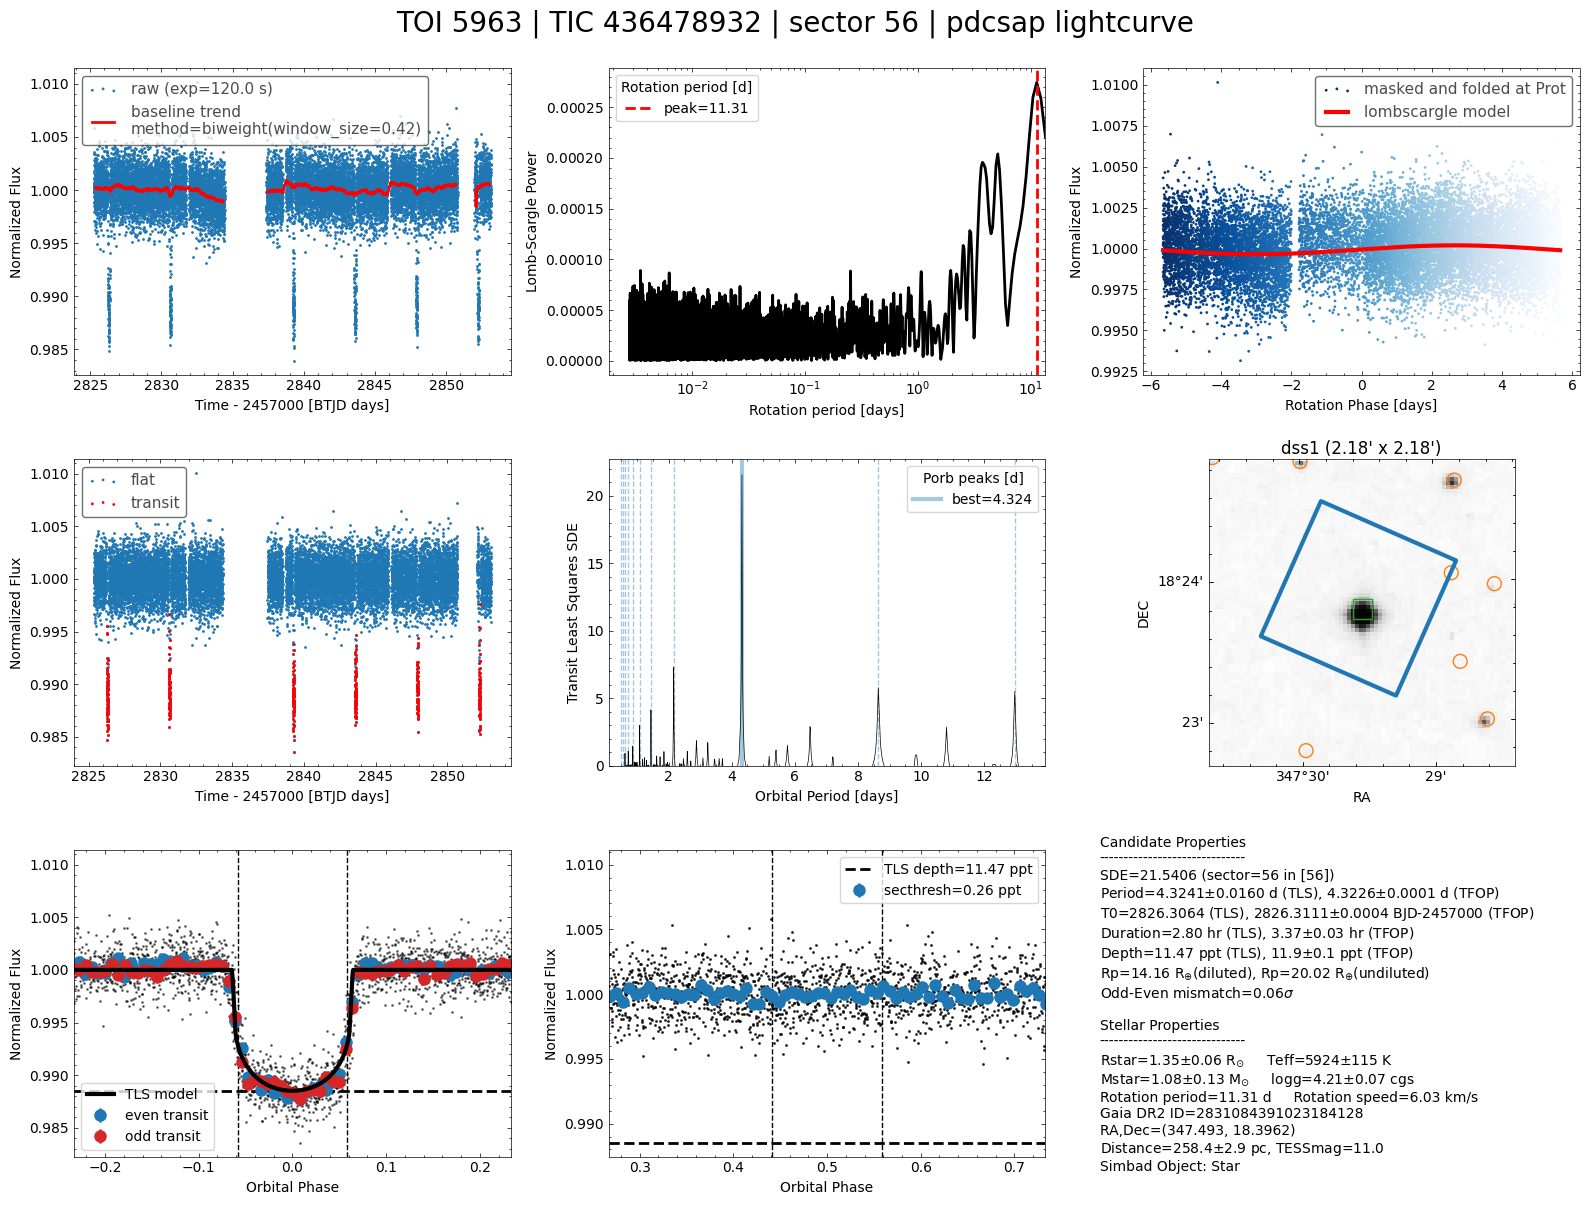

In [4]:
fig = target.plot_tql()

The figure above shows 9 panels. Let's break them down.
* top row
  - left (panel 1): raw lightcurve (blue marker) and trend (red line)
  - middle (panel 2): [Lomb-Scargle periodogram](https://docs.astropy.org/en/stable/timeseries/lombscargle.html) used to estimate the star's rotation period; this is useful to find active and variable stars
  - right (panel 3): raw lightcurve phase-folded at the computed peak of Lomb-Scargle periodogram (corresponding to the stellar rotation period) from panel 1; 
* middle row
  - left (panel 4): flattened lightcurve and detected transits (determined from the TLS periodogram on panel 5)
  - middle (panel 5): periodogram using the [TLS](https://arxiv.org/abs/1901.02015) algorithm
  - right (panel 6): TESS aperture (blue polygon) and annotated Gaia sources (orange and red markers) overlaid on archival [DSS](https://archive.stsci.edu/cgi-bin/dss_form) image centered on the target; this is useful to see if there are potential sources of the signal other than the target
* bottom row
  - left (panel 7): phase-folded lightcurve at the derived peak of TLS periodogram (corresponding to the orbital period); odd (red markers) and even transits (blue markers) and best-fit transit model (black line) are also shown 
  - middle (panel 8): phase-folded lightcurve zoomed at phase=0.5 to check for a secondary eclipse which is a strong indicator of a self-luminous companion such as an eclipsing binary or a high-albedo brown dwarf; the computed transit depth (dashed line) is shown for reference
  - right (panel 8): summary info about the star and (planet) candidate

Note that you can run the above code in the terminal using the `tql` script:
```
(my_env) $ tql -name "WASP-21" 
```